# Ames Housing Data Imputation Notebook

**Group:** Group 75  
**Members:** Georgin Binoy (300233721), Fuad Thabet (300255031)

This notebook implements data imputation on the Ames Iowa Housing Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('AmesHousing.csv')

In [3]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


### We have 27 columns with null rows

The goal will be to choose one imputation method from each type: Univariate, Bivariate, and Multivariate

In [4]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)



Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


## Univariate Imputation Method

Univariate imputation methods are techniques used to handle missing data by imputing missing values based solely on information from the same variable (feature) with the missing entries, without considering relationships with other variables.

Let's look into the attribute 'Lot Frontage' and try to find a way to deal with that high number of missing values

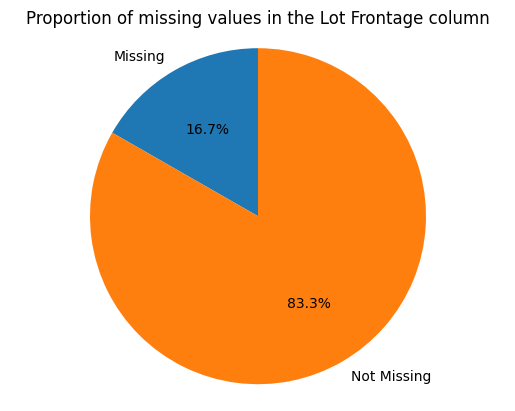

In [5]:
# Create a pie chart representing the proportion of missing values in the lot frontage column.
missing = df['Lot Frontage'].isnull().sum()
not_missing = df['Lot Frontage'].notnull().sum()

# Make a pie chart but include the numbers not the percentage
plt.pie([missing, not_missing], labels=['Missing', 'Not Missing'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of missing values in the Lot Frontage column')
plt.axis('equal')
plt.show()

      Order  Lot Frontage  Lot Area Lot Shape Lot Config
11       12           NaN      7980       IR1     Inside
14       15           NaN      6820       IR1     Corner
22       23           NaN      7500       Reg     Inside
23       24           NaN     11241       IR1    CulDSac
24       25           NaN     12537       IR1    CulDSac
...     ...           ...       ...       ...        ...
2894   2895           NaN     16669       IR1     Corner
2897   2898           NaN     11170       IR2     Corner
2898   2899           NaN      8098       IR1     Inside
2912   2913           NaN     11836       IR1     Corner
2926   2927           NaN      8885       IR1     Inside

[490 rows x 5 columns]


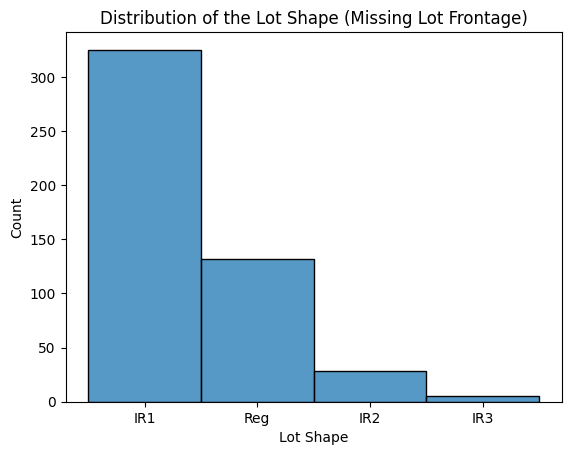

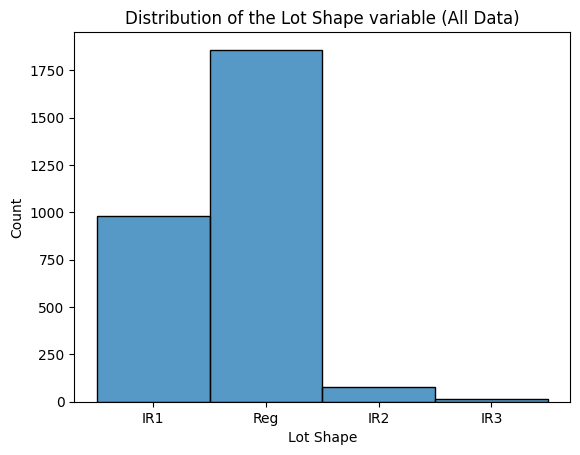

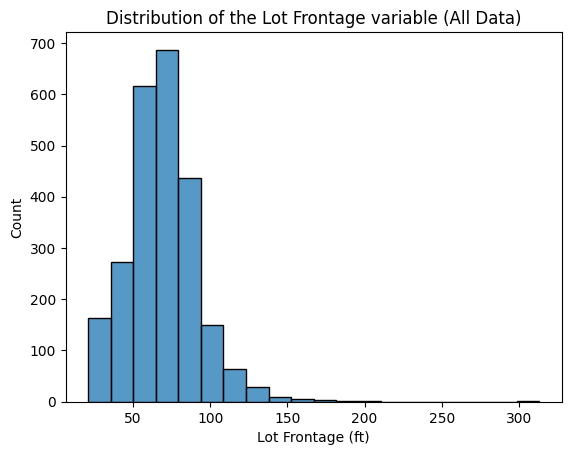

In [6]:
relevantColumns = [
    'Order',
    'Lot Frontage',
    'Lot Area',
    'Lot Shape',
    'Lot Config'
]

missingLotFrontage = df[relevantColumns]
missingLotFrontage = missingLotFrontage[missingLotFrontage['Lot Frontage'].isnull()]
print(missingLotFrontage)

sns.histplot(data = missingLotFrontage['Lot Shape'], bins = 20)
plt.title('Distribution of the Lot Shape (Missing Lot Frontage)')
plt.show()

sns.histplot(data = df['Lot Shape'], bins = 20)
plt.title('Distribution of the Lot Shape variable (All Data)')
plt.show()

sns.histplot(data = df['Lot Frontage'], bins = 20)
plt.title('Distribution of the Lot Frontage variable (All Data)')
plt.xlabel('Lot Frontage (ft)')
plt.show()

Let's look into using a Default Value Imputation. What if we find the mean lot frontage for each lot shape for the non-missing rows, and replace each missing lot frontage with the mean lot frontage of their respective lot shape?

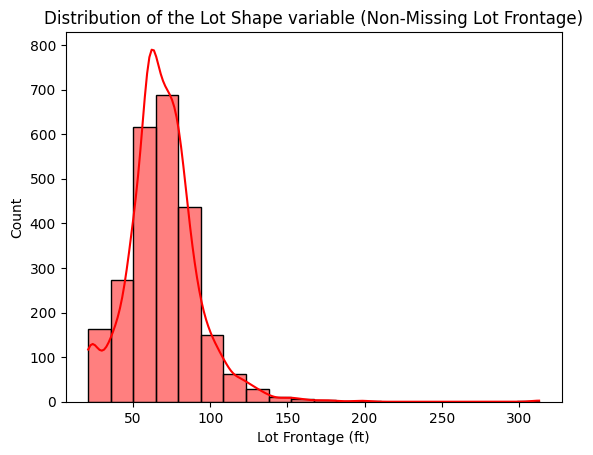

             Order  Lot Frontage       Lot Area
count  2440.000000   2440.000000    2440.000000
mean   1471.819672     69.224590    9709.522951
std     851.493536     23.365335    6424.124499
min       1.000000     21.000000    1300.000000
25%     730.500000     58.000000    7225.250000
50%    1473.500000     68.000000    9248.500000
75%    2203.250000     80.000000   11207.750000
max    2930.000000    313.000000  215245.000000


In [7]:
nonMissingLotFrontage = df[relevantColumns]
nonMissingLotFrontage = nonMissingLotFrontage[nonMissingLotFrontage['Lot Frontage'].notnull()]

IR1 = nonMissingLotFrontage[nonMissingLotFrontage['Lot Shape'] == 'IR1']['Lot Frontage']
IR2 = nonMissingLotFrontage[nonMissingLotFrontage['Lot Shape'] == 'IR2']['Lot Frontage']
IR3 = nonMissingLotFrontage[nonMissingLotFrontage['Lot Shape'] == 'IR3']['Lot Frontage']
Reg = nonMissingLotFrontage[nonMissingLotFrontage['Lot Shape'] == 'Reg']['Lot Frontage']

sns.histplot(nonMissingLotFrontage['Lot Frontage'], bins = 20, kde = True, color = 'red')
plt.title('Distribution of the Lot Shape variable (Non-Missing Lot Frontage)')
plt.xlabel('Lot Frontage (ft)')
plt.show()


print(nonMissingLotFrontage.describe())

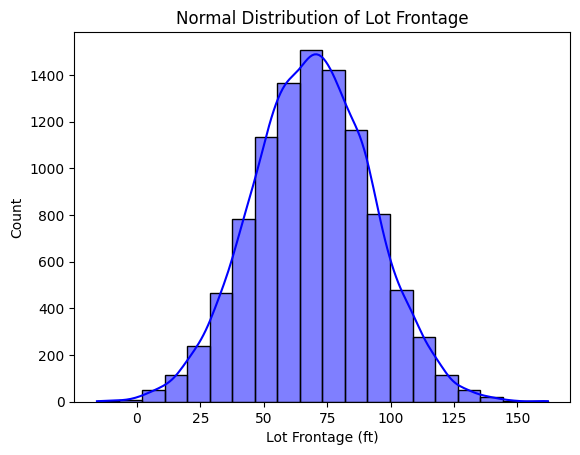

[29.41603384 77.68753307 65.68219679 ... 87.23682852 41.66402155
 85.16113432]


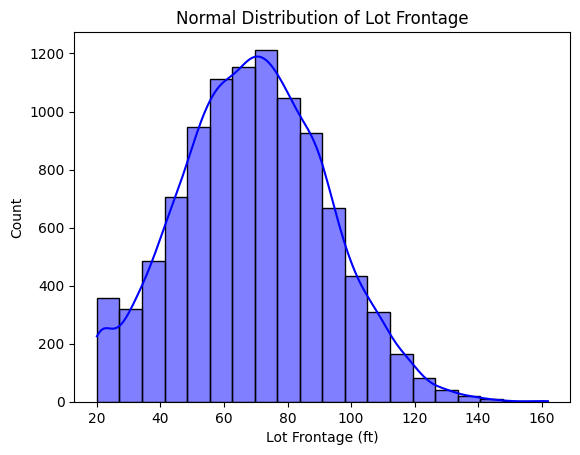

In [8]:
mean = nonMissingLotFrontage['Lot Frontage'].mean()
std = nonMissingLotFrontage['Lot Frontage'].std()

samples = np.random.normal(loc=mean, scale=std, size=10000)

sns.histplot(samples, bins = 20, kde = True, color = 'blue')
plt.title('Normal Distribution of Lot Frontage')
plt.xlabel('Lot Frontage (ft)')
plt.show()

samples = np.clip(samples, a_min=20, a_max=None)
print(samples)

sns.histplot(samples, bins = 20, kde = True, color = 'blue')
plt.title('Normal Distribution of Lot Frontage')
plt.xlabel('Lot Frontage (ft)')
plt.show()

Okay now we have a normal distribution bounded from the minimum value in the dataset for Lot Frontage in order to avoid negative and outlier values. This will allow us to sample values randomly and impute them into the null values we get from the original dataset.

The reason I chose to do this instead of simply picking random values or using the mean to impute the missing values is that it does not feel like a correct way to appropriate this data. There is already a certain underlying distribution in this dataset and if I simply throw in several hundred values that are at the mean, that could drown out the values that are far from the mean and it could shift the mean unfairly. If I simply pick random values each time, I could get a lot of values at the extreme (although unlikely) and that doesn't feel very controlled.

Instead, this way I get to have some influence on how the data is sampled. Choosing a type of kernel density estimation allows me to estimate a more accurate probability density function for the data and a symmetrical distribution is easier than a skewed one, leaving the normal distbribution to be the best option. The reason the second graph above isn't symmetrical is because I set bounds to only allow values above or equal to the minimum from the dataset for the Lot Frontage which came to about 21ft.

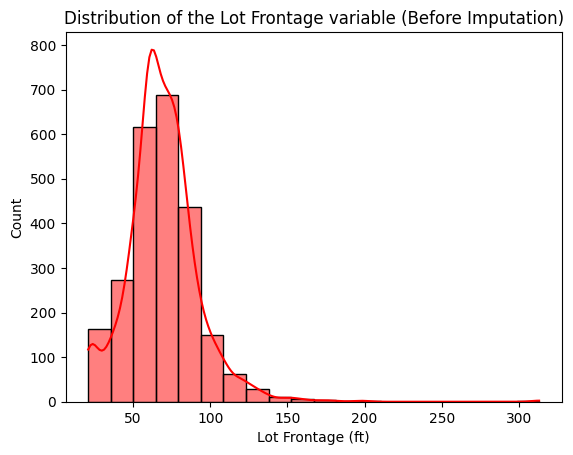

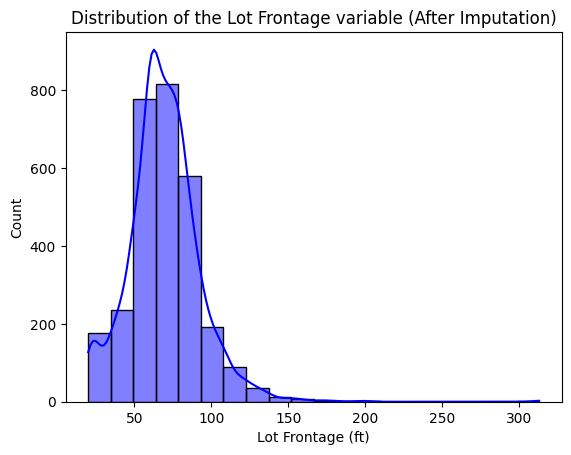

In [9]:
# Replace missing Lot Frontage values with the normal distribution samples

sns.histplot(df['Lot Frontage'], bins = 20, kde = True, color = 'red')
plt.title('Distribution of the Lot Frontage variable (Before Imputation)')
plt.xlabel('Lot Frontage (ft)')
plt.show()


df['Lot Frontage'] = df['Lot Frontage'].apply(lambda x: round(np.random.choice(samples)) if pd.isnull(x) else x)

sns.histplot(df['Lot Frontage'], bins = 20, kde = True, color = 'blue')
plt.title('Distribution of the Lot Frontage variable (After Imputation)')
plt.xlabel('Lot Frontage (ft)')
plt.show()


Looking at both histograms, we see that the distributions are nearly identical. This shows that we did not alter the distribution of the data of the Lot Frontage attribute but still imputed all nearly 500 missing values which made up around 17% of the rows in the dataset. 


### Result: This was simulating MCAR since there was not much of a correlation with the missing values and any other attributes

## Bivariate Imputation Method 

Bivariate imputation methods handle missing data by considering the relationship between two variables—typically the variable with missing values and one other related variable. These methods aim to provide more informed imputations compared to univariate techniques by leveraging correlations or dependencies between the variables.

Look at house year built vs garage year built as a correlation

In [10]:
# How many rows in Garage Yr Blt are null?
print("Missing Garage Year Built: ", df['Garage Yr Blt'].isnull().sum())
print("Missing Garage Type: ", df['Garage Type'].isnull().sum())

# How many rows in Yr Blt are null?
print(df['Year Built'].isnull().sum())
relevantColumns = [
    'Order',
    'Year Built',
    'Garage Type',
    'Garage Yr Blt',
    'Garage Finish',
    'Garage Cars',
    'Garage Area'
]

# Print the two rows that have a garage but the garage year built is null
missingGarageYearBuilt = df[(df['Garage Yr Blt'].isnull()) & (df['Garage Type'].notnull())]
print(missingGarageYearBuilt[relevantColumns])

Missing Garage Year Built:  159
Missing Garage Type:  157
0
      Order  Year Built Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
1356   1357        1910      Detchd            NaN           NaN          1.0   
2236   2237        1923      Detchd            NaN           NaN          NaN   

      Garage Area  
1356        360.0  
2236          NaN  


We have 2 rows where we do not know the year that the garage was built and they have a garage, whereas we have the year built for every home in the dataset. Can we use this to estimate the year the missing garages were built?

Let's note that both of these homes were built between 1910-1930. Could we narrow this down more to use regression imputation?

Percentage of garages built before the house:  0.65 %


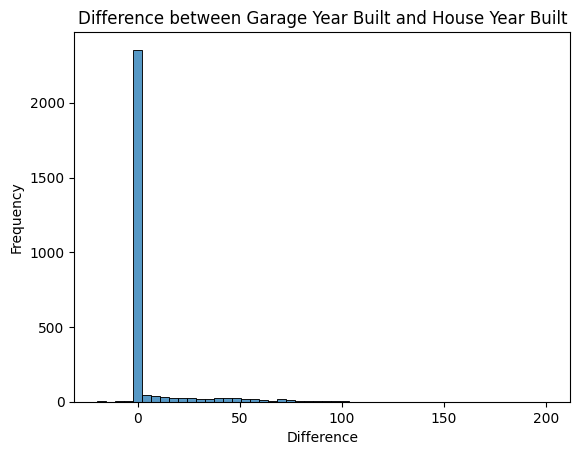

In [11]:
missingGarageYearBuilt = missingGarageYearBuilt[relevantColumns]

garageYears = df[df['Garage Type'].notnull()][relevantColumns]
garageYears['Yr Built vs. Garage Yr Blt Difference'] = garageYears['Garage Yr Blt'] - garageYears['Year Built']

garagesBuiltFirst = garageYears[garageYears['Yr Built vs. Garage Yr Blt Difference'] < 0]
roundedPercentage = round((len(garagesBuiltFirst) / len(garageYears)) * 100, 2)
print("Percentage of garages built before the house: ", roundedPercentage, "%")

sns.histplot(garageYears['Yr Built vs. Garage Yr Blt Difference'], bins=50)
plt.title('Difference between Garage Year Built and House Year Built')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()


As we have shown in the code above, there's only 0.65% of homes whose garages were built before the home itself. For our purposes here, let's just omit these rows and focus on the ones where the garages were built after the homes.

Also, there's probably too much data we're considering at once and since both homes missing the data we are looking to impute are in the early 1900s, let's narrow our horizons.

count    308.000000
mean      26.269481
std       29.921865
min        0.000000
25%        0.000000
50%       13.500000
75%       50.000000
max      100.000000
Name: Yr Built vs. Garage Yr Blt Difference, dtype: float64
     Order  Year Built Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
82      83        1920      Detchd         1920.0           Unf          1.0   
153    154        1920      Detchd         1989.0           Unf          2.0   
169    170        1900     Basment         1900.0           Unf          1.0   
172    173        1927      Detchd         1927.0           Unf          2.0   
174    175        1915      Detchd         1915.0           Unf          1.0   

     Garage Area  Yr Built vs. Garage Yr Blt Difference  
82         429.0                                    0.0  
153        676.0                                   69.0  
169        240.0                                    0.0  
172        360.0                                    0.0  
174      

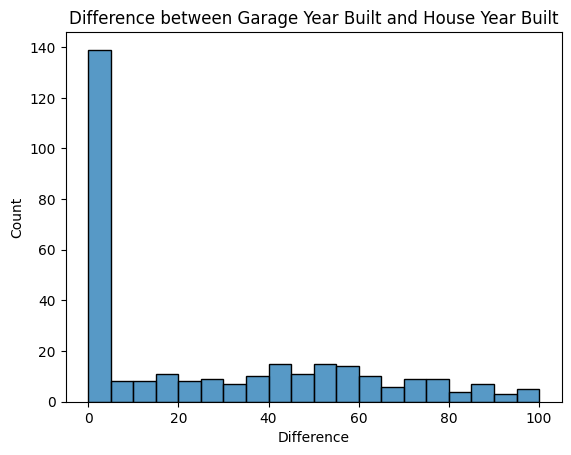

Percentage of garages built within 20 years of the house:  55.19 %
Percentage of garages built the same year as the house:  42.86 %


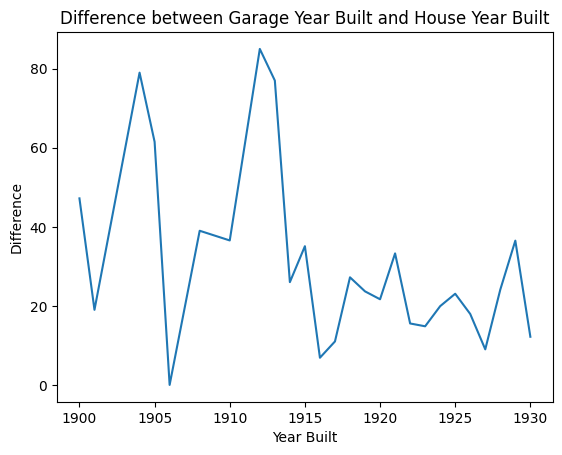

In [12]:
garageYears = garageYears[garageYears['Yr Built vs. Garage Yr Blt Difference'] >= 0]

# Only consider homes built between 1900 and 1930
garageYears = garageYears[(garageYears['Year Built'] >= 1900) & (garageYears['Year Built'] <= 1930)]
print(garageYears['Yr Built vs. Garage Yr Blt Difference'].describe())
print(garageYears.head())

sns.histplot(garageYears['Yr Built vs. Garage Yr Blt Difference'], bins=20)
plt.title('Difference between Garage Year Built and House Year Built')
plt.xlabel('Difference')
plt.show()

# Get the percentage of garages built within 3 years of the house
garagesBuiltWithin20Years = garageYears[garageYears['Yr Built vs. Garage Yr Blt Difference'] <= 20]
roundedPercentage = round((len(garagesBuiltWithin20Years) / len(garageYears)) * 100, 2)
print("Percentage of garages built within 20 years of the house: ", roundedPercentage, "%")

garagesBuiltSameYear = garageYears[garageYears['Yr Built vs. Garage Yr Blt Difference'] == 0]
roundedPercentage = round((len(garagesBuiltSameYear) / len(garageYears)) * 100, 2)
print("Percentage of garages built the same year as the house: ", roundedPercentage, "%")

sns.lineplot(data=garageYears, x='Year Built', y='Yr Built vs. Garage Yr Blt Difference', errorbar=None)
plt.title('Difference between Garage Year Built and House Year Built')
plt.xlabel('Year Built')
plt.ylabel('Difference')
plt.show()


There are still over 300 rows that are within the constraints we set above. This should give us some indication for how to fill in this missing data. Looking at the graph above, we can see a weak trend but a trend nonetheless. This can help us determine a weight and slope for the regression imputation

159
Row before imputation:
  Order              1357
Year Built         1910
Garage Type      Detchd
Garage Yr Blt       NaN
Garage Finish       NaN
Garage Cars         1.0
Garage Area       360.0
Name: 1356, dtype: object
Predicted year:  1976
Row before imputation:
  Order              2237
Year Built         1923
Garage Type      Detchd
Garage Yr Blt       NaN
Garage Finish       NaN
Garage Cars         NaN
Garage Area         NaN
Name: 2236, dtype: object
Predicted year:  1991
(0, 82)
157


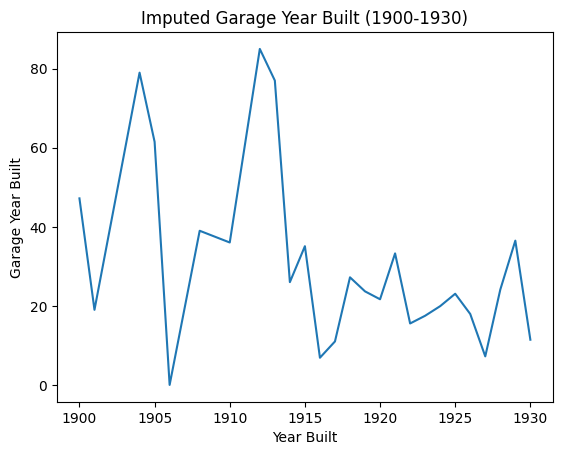

In [13]:
def impute_garage_year(row):
    if pd.isna(row['Garage Yr Blt']) and not pd.isna(row['Garage Type']):
        print("Row before imputation:\n ", row[relevantColumns])
        year_built = row['Year Built']
        predicted_year = round(1.15 * year_built - 220)
        print("Predicted year: ", predicted_year)
        return predicted_year
    return row['Garage Yr Blt']

print(df['Garage Yr Blt'].isnull().sum())

df['Garage Yr Blt'] = df.apply(impute_garage_year, axis=1)

imputedData = df[df['Garage Yr Blt'].isnull() & df['Garage Type'].notnull()]
print(imputedData.shape)

print(df['Garage Yr Blt'].isnull().sum())

df['Yr Built vs. Garage Yr Blt Difference'] = df['Garage Yr Blt'] - df['Year Built']
sns.lineplot(data=df[(df['Year Built'] >= 1900) & (df['Year Built'] <= 1930)], x='Year Built', y='Yr Built vs. Garage Yr Blt Difference', errorbar=None)
plt.title('Imputed Garage Year Built (1900-1930)')
plt.xlabel('Year Built')
plt.ylabel('Garage Year Built')
plt.show()


### Result: This is simulating MAR since we notice that the two homes missing the Garage Yr Built attribute but had the Garage Type also had other data to support the fact that they had garages

## Multivariate Imputation

Our analysis shows that approximately 100% of missing Pool QC values occur when Pool Area = 0. This is a classic case of "structural zeros" or "missing by design". The missing value doesn't represent missing data but rather indicates that the feature doesn't exist (no pool = no pool quality to assess)

Standard imputation methods would incorrectly impute pool quality values for houses without pools. This would introduce bias and illogical values into the dataset. Recognizing this pattern allows for more appropriate handling

In [14]:
pool_features = ['Pool QC', 'Pool Area']
for feature in pool_features:
    missing_count = df[feature].isna().sum()
    missing_percent = (missing_count / len(df) * 100)
    print(f"{feature} - Missing values: {missing_count} ({missing_percent:.2f}%)")

Pool QC - Missing values: 2917 (99.56%)
Pool Area - Missing values: 0 (0.00%)


First, let's look for the relationship

In [19]:
print("\nPool Area distribution:")
print(df['Pool Area'].value_counts().sort_index().head(10))

zeroPoolArea = (df['Pool Area'] == 0).sum()
print(f"\nHouses with Pool Area = 0: {zeroPoolArea} ({zeroPoolArea/len(df)*100:.2f}%)")


Pool Area distribution:
Pool Area
0      2917
144       1
228       1
368       1
444       1
480       1
512       1
519       1
555       1
561       1
Name: count, dtype: int64

Houses with Pool Area = 0: 2917 (99.56%)


In [28]:
missingPoolQc = df['Pool QC'].isna().sum()
missingPoolQcWhenZeroArea = df[(df['Pool Area'] == 0) & (df['Pool QC'].isna())].shape[0]
missingPoolQcWhenNonzeroArea = df[(df['Pool Area'] > 0) & (df['Pool QC'].isna())].shape[0]

print(f"\nMissing Pool QC: {missingPoolQc} ({missingPoolQc/len(df)*100:.2f}%)")
print(f"Missing Pool QC when Pool Area = 0: {missingPoolQcWhenZeroArea} ({missingPoolQcWhenZeroArea/len(df)*100:.2f}%)")
print(f"Missing Pool QC when Pool Area > 0: {missingPoolQcWhenNonzeroArea} ({missingPoolQcWhenNonzeroArea/len(df)*100:.2f}%)")


Missing Pool QC: 2917 (99.56%)
Missing Pool QC when Pool Area = 0: 2917 (99.56%)
Missing Pool QC when Pool Area > 0: 0 (0.00%)


In [31]:
originalPoolQc = df['Pool QC'].copy()

mnarEvidence = {
    'totalMissingPoolQc': missingPoolQc,
    'missingWhenZeroArea': missingPoolQcWhenZeroArea,
    'missingWhenNonzeroArea': missingPoolQcWhenNonzeroArea,
    'percentDueToZeroArea': missingPoolQcWhenZeroArea / missingPoolQc * 100
}

df.loc[df['Pool Area'] == 0, 'Pool QC'] = 'None'

# Handle any remaining missing Pool QC values (for houses with pools)
housesWithPools = df[df['Pool Area'] > 0].copy()
missingPoolQcWithPools = housesWithPools['Pool QC'].isna().sum()

if missingPoolQcWithPools > 0:
    # Group pools by size and find most common Pool QC for each group
    trainData = housesWithPools.dropna(subset=['Pool QC'])
    poolAreaGroups = pd.cut(trainData['Pool Area'], bins=3)
    poolQcByAreaGroup = trainData.groupby(poolAreaGroups)['Pool QC'].apply(lambda x: x.mode()[0] if not x.empty else None)
    
    # Apply this to impute missing values
    for areaGroup, qcValue in poolQcByAreaGroup.items():
        if qcValue is not None:
            indices = housesWithPools[(housesWithPools['Pool Area'].between(areaGroup.left, areaGroup.right)) & 
                                    (housesWithPools['Pool QC'].isna())].index
            df.loc[indices, 'Pool QC'] = qcValue


In [35]:
# Before vs After counts
beforeCounts = originalPoolQc.value_counts(dropna=False)
afterCounts = df['Pool QC'].value_counts(dropna=False)

print("\n--- Before vs. After Value Counts ---")
comparisonCounts = pd.DataFrame({
    'Before': beforeCounts,
    'After': afterCounts
})
print(comparisonCounts)

# Show sample of rows that changed
print("\n--- Sample of Changed Values ---")
# Add PID and Pool Area to make it more informative
changedRows = pd.DataFrame({
    'PID': df['PID'],
    'Pool Area': df['Pool Area'],
    'Original Pool QC': originalPoolQc,
    'Imputed Pool QC': df['Pool QC']
})
changedRows = changedRows[changedRows['Original Pool QC'] != changedRows['Imputed Pool QC']]
print(f"Total rows changed: {len(changedRows)}")
print(changedRows.head(10))  # Show first 10 changes

# Summarize the imputation by pool area groups
print("\n--- Imputation Summary by Pool Size ---")
if missingPoolQcWithPools > 0 and 'poolAreaGroups' in locals() and 'poolQcByAreaGroup' in locals():
    # Convert the interval index to strings for clearer display
    sizeMapping = {}
    for idx, value in poolQcByAreaGroup.items():
        sizeMapping[f"{idx.left:.1f}-{idx.right:.1f}"] = value
    
    print("Pool sizes and their imputed quality values:")
    for size, quality in sizeMapping.items():
        print(f"Pool Area {size}: Imputed as '{quality}'")

# Show distribution of Pool QC after imputation for houses with pools
print("\n--- Distribution of Pool QC for Houses with Pools ---")
poolQcDistribution = df[df['Pool Area'] > 0]['Pool QC'].value_counts()
print(poolQcDistribution)

# Show the final missing count (should be 0)
print(f"\nRemaining missing Pool QC values: {df['Pool QC'].isna().sum()}")


--- Before vs. After Value Counts ---
         Before   After
Pool QC                
Ex          4.0     4.0
Fa          2.0     2.0
Gd          4.0     4.0
None        NaN  2917.0
TA          3.0     3.0
NaN      2917.0     NaN

--- Sample of Changed Values ---
Total rows changed: 2917
         PID  Pool Area Original Pool QC Imputed Pool QC
0  526301100          0              NaN            None
1  526350040          0              NaN            None
2  526351010          0              NaN            None
3  526353030          0              NaN            None
4  527105010          0              NaN            None
5  527105030          0              NaN            None
6  527127150          0              NaN            None
7  527145080          0              NaN            None
8  527146030          0              NaN            None
9  527162130          0              NaN            None

--- Imputation Summary by Pool Size ---

--- Distribution of Pool QC for Houses wi

### Result: This was an example of the MNAR pattern since there was a direct reason for the values in the column to be missing and it was due to the way the data was retrieved. This solution allows us to intentionally set a None value to the data in order to make it clear that its not missing, but rather, the data is that the value is None. It may seem useless but this sort of imputation can help clear up confusion in the dataset